In [1]:
import pandas as pd
from sklearn.cluster import KMeans  
from collections import Counter
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,FastICA
from sklearn.random_projection import GaussianRandomProjection

C:\Users\huimi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data=pd.read_excel('E:\Machine Learning\HW3\Wine.xlsx')
y=data['Class']
X = data.drop('Class',axis=1)

In [3]:
X2=StandardScaler().fit_transform(X)

C:\Users\huimi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\huimi\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
ICA=FastICA(n_components=2,random_state=12)
ICAComponents=ICA.fit_transform(X2)
ICADf=pd.DataFrame(data=ICAComponents, columns=
                        ['Ic1','Ic2'])
finalDf = pd.concat([ICADf, y], axis = 1)

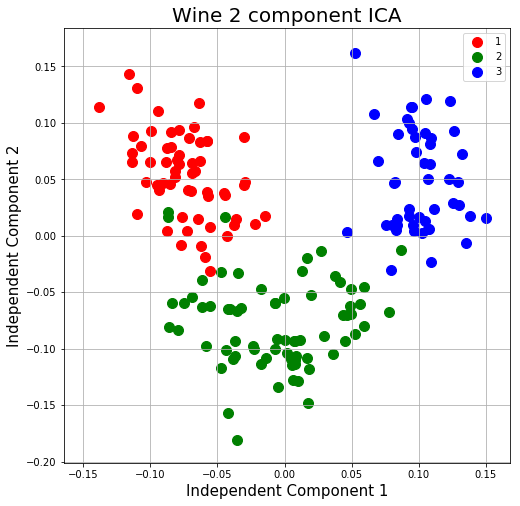

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Independent Component 1', fontsize = 15)
ax.set_ylabel('Independent Component 2', fontsize = 15)
ax.set_title('Wine 2 component ICA', fontsize = 20)
targets = [1,2,3]
colors = ['r', 'g','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Ic1']
               , finalDf.loc[indicesToKeep, 'Ic2']
               , c = color
               , s = 100)
ax.legend(targets)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2ICA_Wine.png')

In [9]:
kmeans_ic=KMeans(n_clusters=3,random_state=3,n_init=100)
kmeans_ic.fit(ICADf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=100, n_jobs=None, precompute_distances='auto',
    random_state=3, tol=0.0001, verbose=0)

In [11]:
yp_ic=kmeans_ic.labels_
order=[[1,2,0],[1,0,2],[2,1,0],[2,0,1],[0,1,2],[0,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y)):
        if y[i]==1 and yp_ic[i]==k[0]:
            accurate=accurate+1/len(y)
        elif y[i]==2 and yp_ic[i]==k[1]:
            accurate=accurate+1/len(y)
        elif y[i]==3 and yp_ic[i]==k[2]:
            accurate+=1/len(y)
    if accurate>finalacc:
        finalacc=accurate
        index=k
    accurate=0
print('finalacc:',finalacc)
print('index:',index)

finalacc: 0.9719101123595526
index: [1, 0, 2]


In [20]:
RCA=GaussianRandomProjection(n_components=2,random_state=3)
X_RCA=RCA.fit_transform(X2)
RCADf=pd.DataFrame(data=X_RCA, columns=
                        ['Rc1','Rc2'])
finalRCADf = pd.concat([RCADf, y], axis = 1)

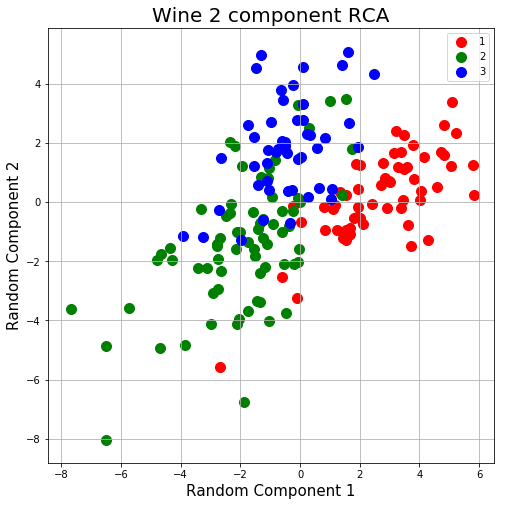

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Random Component 1', fontsize = 15)
ax.set_ylabel('Random Component 2', fontsize = 15)
ax.set_title('Wine 2 component RCA', fontsize = 20)
targets = [1,2,3]
colors = ['r', 'g','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalRCADf['Class'] == target
    ax.scatter(finalRCADf.loc[indicesToKeep, 'Rc1']
               , finalRCADf.loc[indicesToKeep, 'Rc2']
               , c = color
               , s = 100)
ax.legend(targets)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2RCA_Wine4.png')

In [26]:
kmeans4Rc=KMeans(n_clusters=3,n_init=500,max_iter=100,random_state=3)
kmeans4Rc.fit(X_RCA)
yp_k4Rc=kmeans4Rc.labels_

In [27]:
order=[[1,2,0],[1,0,2],[2,1,0],[2,0,1],[0,1,2],[0,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y)):
        if y[i]==1 and yp_k4Rc[i]==k[0]:
            accurate=accurate+1/len(y)
        elif y[i]==2 and yp_k4Rc[i]==k[1]:
            accurate=accurate+1/len(y)
        elif y[i]==3 and yp_k4Rc[i]==k[2]:
            accurate+=1/len(y)
    if accurate>finalacc:
        finalacc=accurate
        index=k
    accurate=0
print('finalacc:',finalacc)
print('index:',index)

finalacc: 0.8202247191011253
index: [0, 1, 2]


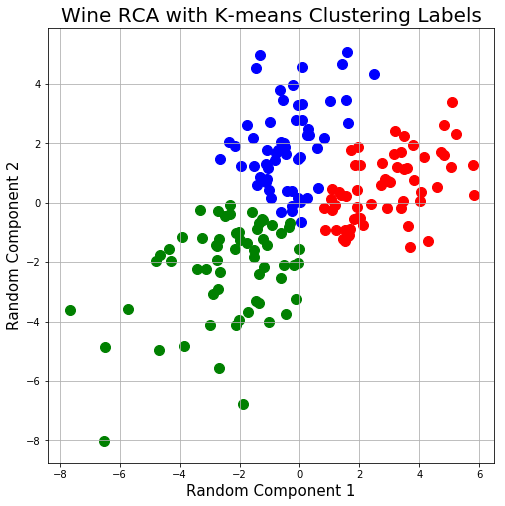

In [29]:
YP=pd.DataFrame(data=yp_k4Rc, columns=
                        ['pre_label'])
predDf=pd.concat([RCADf,YP],axis=1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Random Component 1', fontsize = 15)
ax.set_ylabel('Random Component 2', fontsize = 15)
ax.set_title('Wine RCA with K-means Clustering Labels', fontsize = 20)
targets = [0,1,2]
colors = ['r','g','b']
for target, color in zip(targets,colors):
    indicesToKeep = predDf['pre_label'] == target
    ax.scatter(predDf.loc[indicesToKeep, 'Rc1']
               , predDf.loc[indicesToKeep, 'Rc2']
               , c = color
               , s = 100)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2RCA_KMclustering_Wine.png')

In [35]:
EM_rc=GaussianMixture(n_components=3,n_init=10,random_state=3)
EM_rc.fit(X_RCA)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=3, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [38]:
yrc_EMp=EM_rc.predict(X_RCA)
order=[[1,2,0],[1,0,2],[2,1,0],[2,0,1],[0,1,2],[0,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y)):
        if y[i]==1 and yrc_EMp[i]==k[0]:
            accurate=accurate+1/len(y)
        elif y[i]==2 and yrc_EMp[i]==k[1]:
            accurate=accurate+1/len(y)
        elif y[i]==3 and yrc_EMp[i]==k[2]:
            accurate+=1/len(y)
    if accurate>finalacc:
        finalacc=accurate
        index=k
    accurate=0
print('finalacc:',finalacc)
print('index:',index)

finalacc: 0.7977528089887657
index: [1, 2, 0]


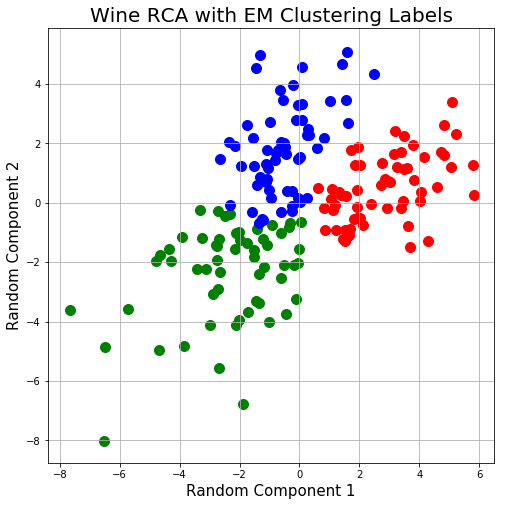

In [39]:
YP=pd.DataFrame(data=yrc_EMp, columns=
                        ['pre_label'])
predDf=pd.concat([RCADf,YP],axis=1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Random Component 1', fontsize = 15)
ax.set_ylabel('Random Component 2', fontsize = 15)
ax.set_title('Wine RCA with EM Clustering Labels', fontsize = 20)
targets = [1,2,0]
colors = ['r','g','b']
for target, color in zip(targets,colors):
    indicesToKeep = predDf['pre_label'] == target
    ax.scatter(predDf.loc[indicesToKeep, 'Rc1']
               , predDf.loc[indicesToKeep, 'Rc2']
               , c = color
               , s = 100)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2RCA_EMclustering_Wine.png')

In [40]:
from sklearn import cluster

In [45]:
agglo=cluster.FeatureAgglomeration(n_clusters=2)
agglo.fit(X2)
X_reduced=agglo.transform(X2)

In [51]:
agglo.labels_

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [46]:
AGDf=pd.DataFrame(data=X_reduced, columns=
                        ['AGc1','AGc2'])
finalDf = pd.concat([AGDf, y], axis = 1)

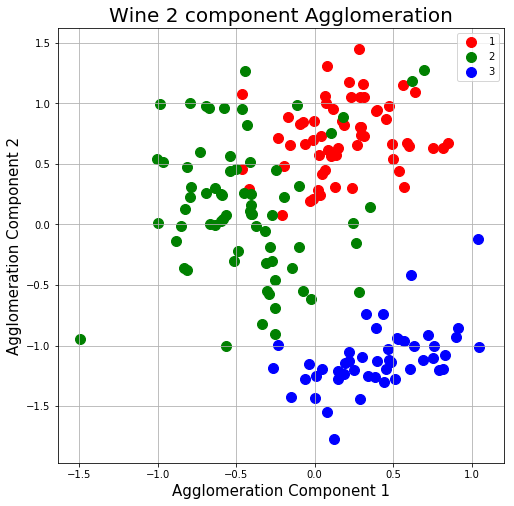

In [47]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Agglomeration Component 1', fontsize = 15)
ax.set_ylabel('Agglomeration Component 2', fontsize = 15)
ax.set_title('Wine 2 component Agglomeration', fontsize = 20)
targets = [1,2,3]
colors = ['r', 'g','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'AGc1']
               , finalDf.loc[indicesToKeep, 'AGc2']
               , c = color
               , s = 100)
ax.legend(targets)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2AGG_Wine.png')

In [48]:
kmeansAG=KMeans(n_clusters=3,n_init=500,max_iter=100,random_state=3)
kmeansAG.fit(X_reduced)
yp_kAG=kmeansAG.labels_

In [49]:
order=[[1,2,0],[1,0,2],[2,1,0],[2,0,1],[0,1,2],[0,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y)):
        if y[i]==1 and yp_kAG[i]==k[0]:
            accurate=accurate+1/len(y)
        elif y[i]==2 and yp_kAG[i]==k[1]:
            accurate=accurate+1/len(y)
        elif y[i]==3 and yp_kAG[i]==k[2]:
            accurate+=1/len(y)
    if accurate>finalacc:
        finalacc=accurate
        index=k
    accurate=0
print('finalacc:',finalacc)
print('index:',index)

finalacc: 0.8595505617977546
index: [2, 0, 1]


In [52]:
EM_4AGc=GaussianMixture(n_components=3,n_init=500,random_state=5,tol=0.001)
EM_4AGc.fit(X_reduced)
yp_EM4AGc=EM_4AGc.predict(X_reduced)

In [53]:
order=[[1,2,0],[1,0,2],[2,1,0],[2,0,1],[0,1,2],[0,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y)):
        if y[i]==1 and yp_EM4AGc[i]==k[0]:
            accurate=accurate+1/len(y)
        elif y[i]==2 and yp_EM4AGc[i]==k[1]:
            accurate=accurate+1/len(y)
        elif y[i]==3 and yp_EM4AGc[i]==k[2]:
            accurate+=1/len(y)
    if accurate>finalacc:
        finalacc=accurate
        index=k
    accurate=0
print('finalacc:',finalacc)
print('index:',index)

finalacc: 0.8876404494382041
index: [0, 2, 1]


In [58]:
t = np.array([2, 3])
K=np.array([])
K = np.append(t, 4)

In [59]:
K

array([2, 3, 4])